<a href="https://colab.research.google.com/github/ukhyun-lee/stock_market_analysis/blob/main/%EC%A4%91%EA%B8%89/13%EC%9D%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# method 1

In [2]:
data = pd.read_csv('sample_data/AirPassengers.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
pd.to_datetime(data.Month)

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [5]:
data['Month'] = pd.to_datetime(data.Month)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [7]:
data.set_index('Month', inplace=True)

In [8]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# method 2

In [9]:
data = pd.read_csv('sample_data/AirPassengers.csv', parse_dates=[0])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


# method 3

In [11]:
data = pd.read_csv('sample_data/AirPassengers.csv', parse_dates=[0], index_col=[0])

In [12]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# plot

In [13]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

## method 1

In [14]:
data.index = data.index.to_period(freq='M')

In [15]:
data.index

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
             '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', name='Month', length=144)

## method 2

In [16]:
data = pd.read_csv('sample_data/AirPassengers.csv', parse_dates=[0], index_col=[0])

In [17]:
data.index.freq = 'MS'   # data.index.freq = 'M'

In [18]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [19]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

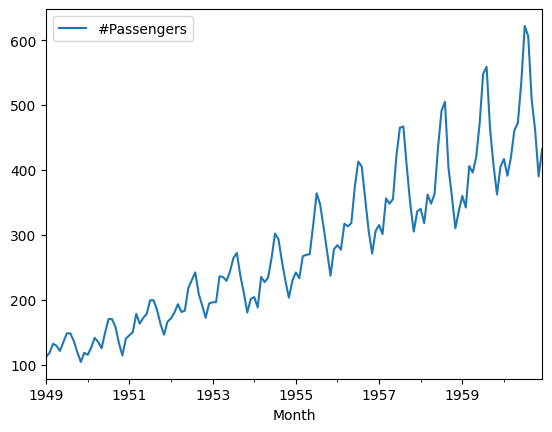

In [20]:
data.plot.line()

# 비추 (pandas)

<Axes: xlabel='Month'>

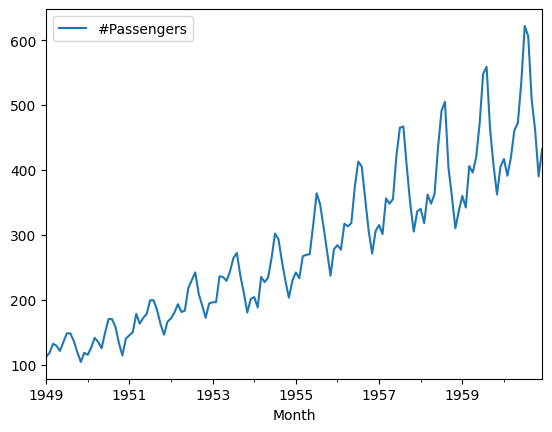

In [21]:
data.plot()
#plt.title('Title')

<Axes: xlabel='Month'>

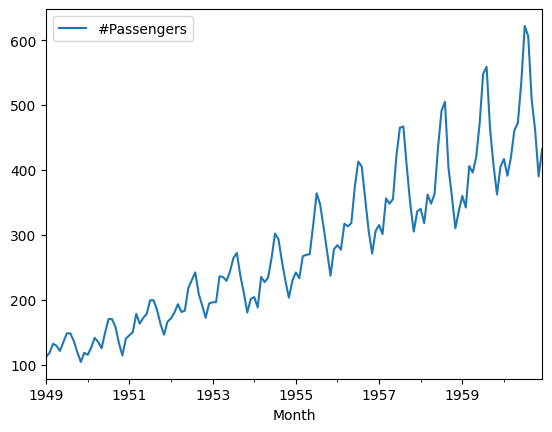

In [22]:
data.plot.line()

<Axes: xlabel='Month'>

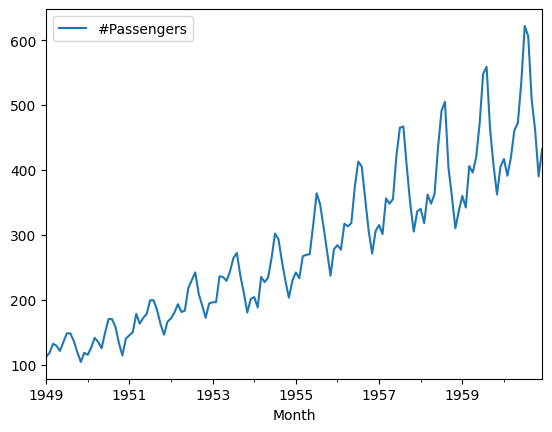

In [23]:
data.plot(kind='line')

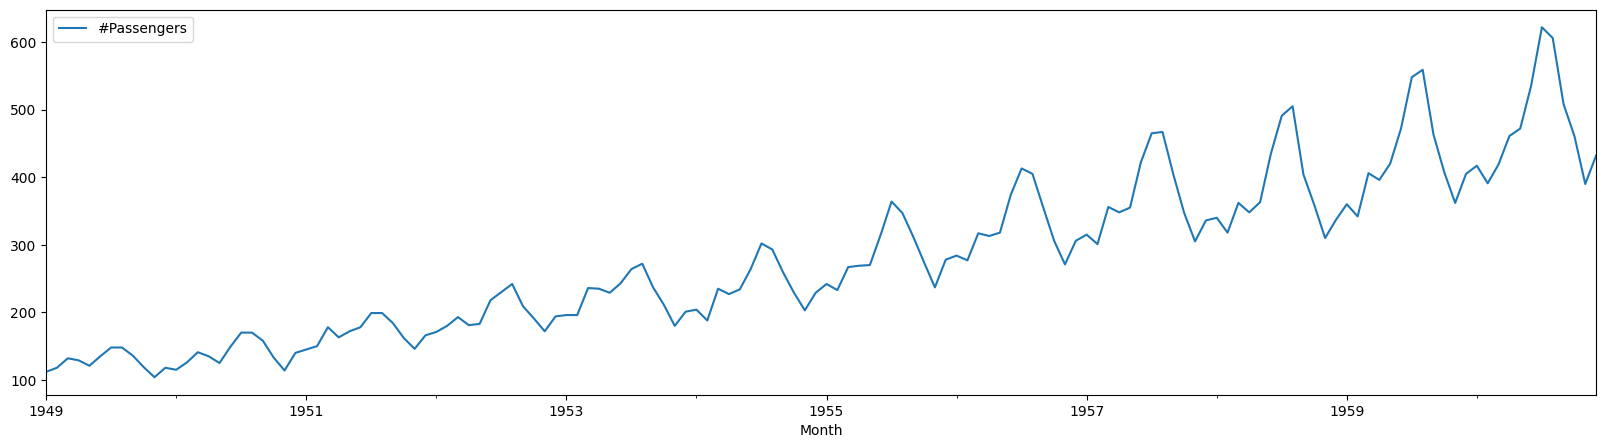

In [24]:
g = data.plot(figsize=(20,5))

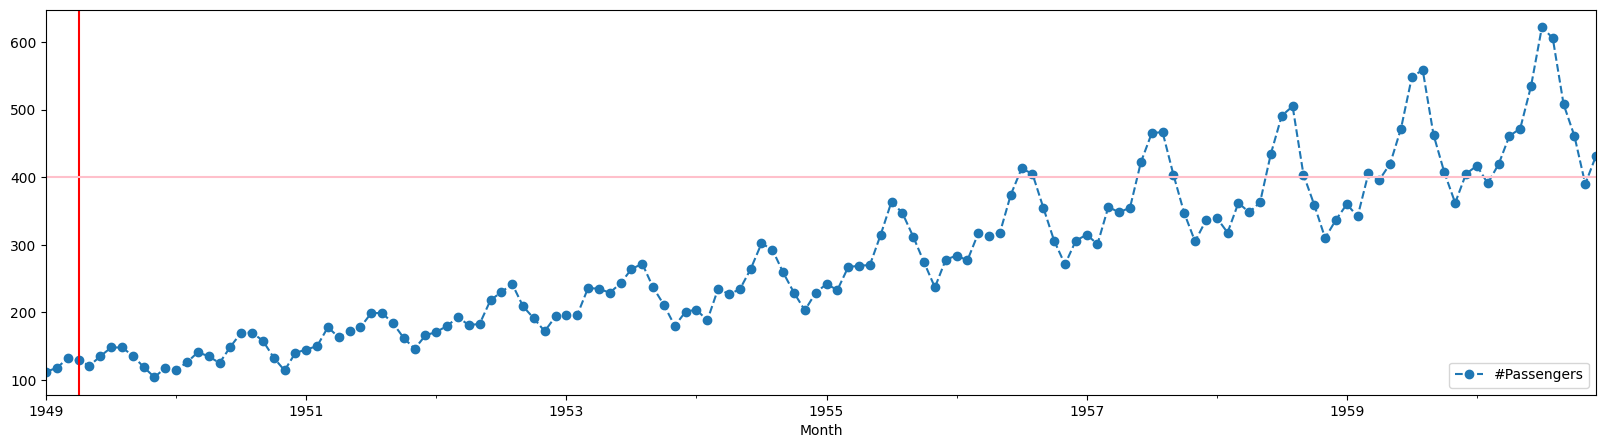

In [25]:
g = data.plot(figsize=(20,5), marker='o', linestyle='--')
g.axvline(pd.Period('1949-04-01', 'M'), color='red')
g.axhline(400, color='pink')
# g.fill_between(data.index, data['#Passengers'])

# 추천 (matplotlib)

In [26]:
import matplotlib.pyplot as plt

(0.0, 700.0)

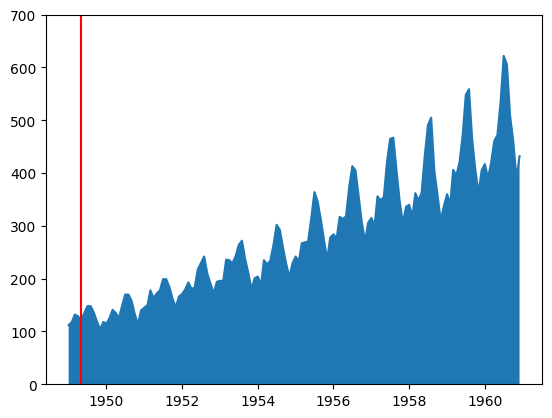

In [27]:
fig, ax = plt.subplots()
ax.plot(data.index, data['#Passengers'])
ax.axvline(pd.Period('1949-04-01', 'M'), color='red')
ax.fill_between(data.index, data['#Passengers'])
ax.set_ylim([0, 700])

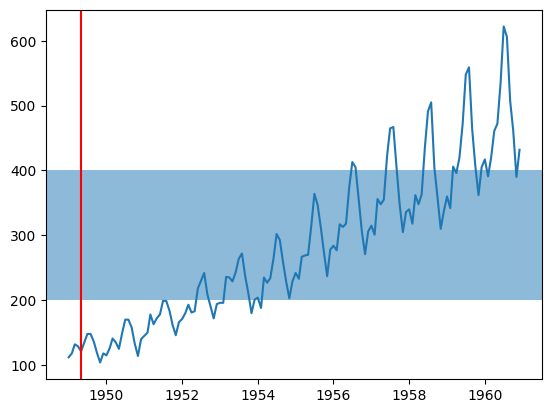

In [28]:
fig, ax = plt.subplots()
ax.plot(data.index, data['#Passengers'])
ax.axvline(pd.Period('1949-04-01', 'M'), color='red')
ax.axhspan(200,400, alpha=0.5)

# seaborn

In [29]:
import seaborn as sns

<Axes: xlabel='Month'>

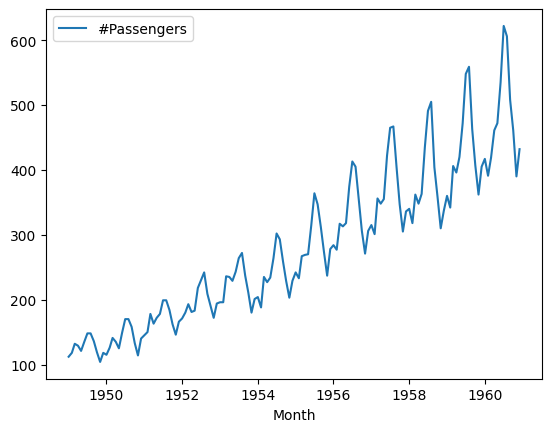

In [30]:
sns.lineplot(data)

<Axes: xlabel='Month', ylabel='#Passengers'>

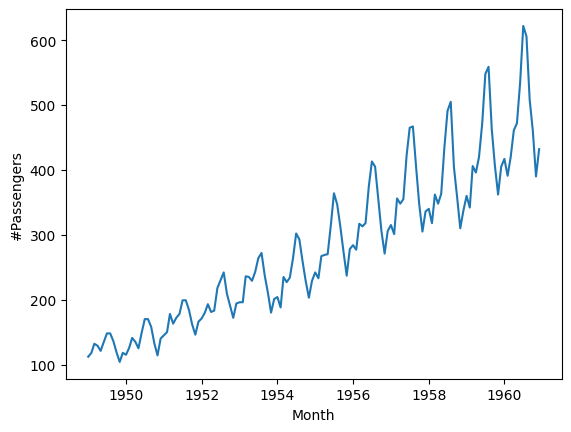

In [31]:
sns.lineplot(data, x=data.index, y='#Passengers')

In [32]:
data2 = data.reset_index()

<Axes: xlabel='Month', ylabel='#Passengers'>

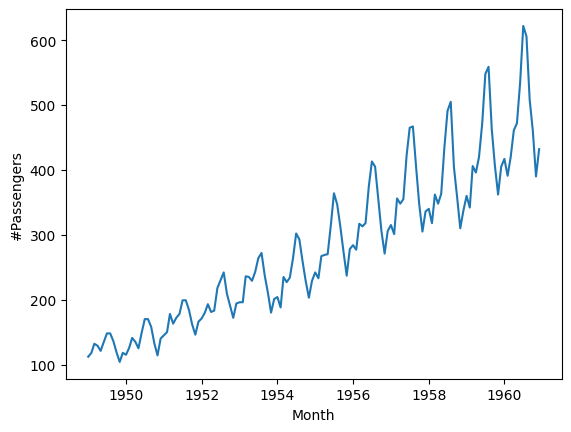

In [33]:
sns.lineplot(data2, x='Month', y='#Passengers')

In [34]:
data2.Month.dt.year

0      1949
1      1949
2      1949
3      1949
4      1949
       ... 
139    1960
140    1960
141    1960
142    1960
143    1960
Name: Month, Length: 144, dtype: int64

In [35]:
data2.Month.dt.month

0       1
1       2
2       3
3       4
4       5
       ..
139     8
140     9
141    10
142    11
143    12
Name: Month, Length: 144, dtype: int64

In [36]:
data2.Month.dt.month_name()

0        January
1       February
2          March
3          April
4            May
         ...    
139       August
140    September
141      October
142     November
143     December
Name: Month, Length: 144, dtype: object

In [37]:
data2['month'] = data2.Month.dt.month
data2['month_name'] = data2.Month.dt.month_name()
data2['year'] = data2.Month.dt.year

<Axes: xlabel='month', ylabel='#Passengers'>

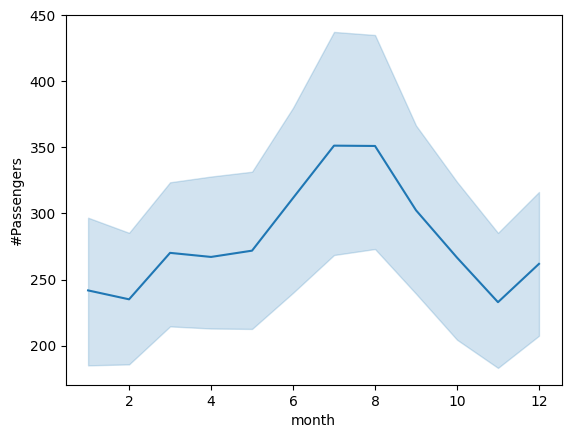

In [38]:
sns.lineplot(data2, x='month', y='#Passengers')

<Axes: xlabel='Month', ylabel='#Passengers'>

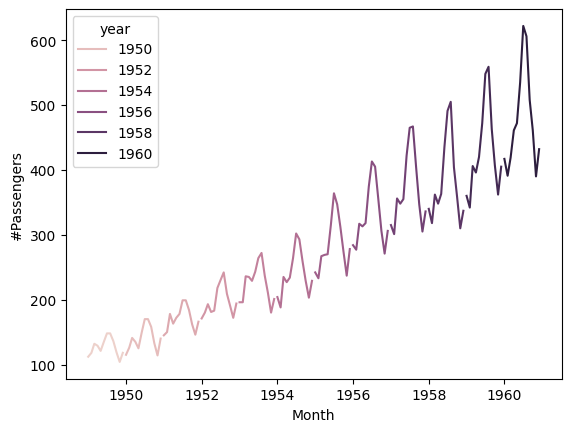

In [39]:
sns.lineplot(data2, x='Month', y='#Passengers', hue='year')

<Axes: xlabel='month', ylabel='#Passengers'>

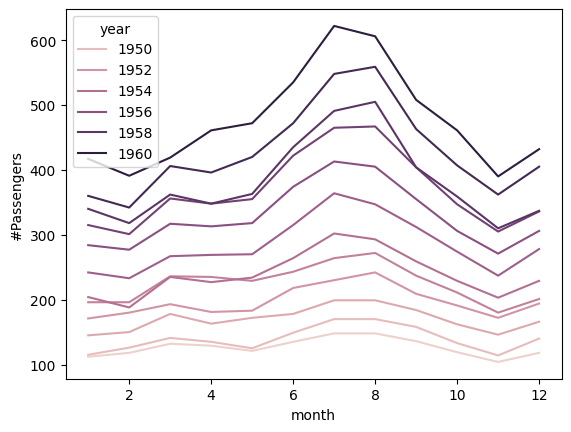

In [40]:
sns.lineplot(data2, x='month', y='#Passengers', hue='year')

<Axes: xlabel='month_name', ylabel='#Passengers'>

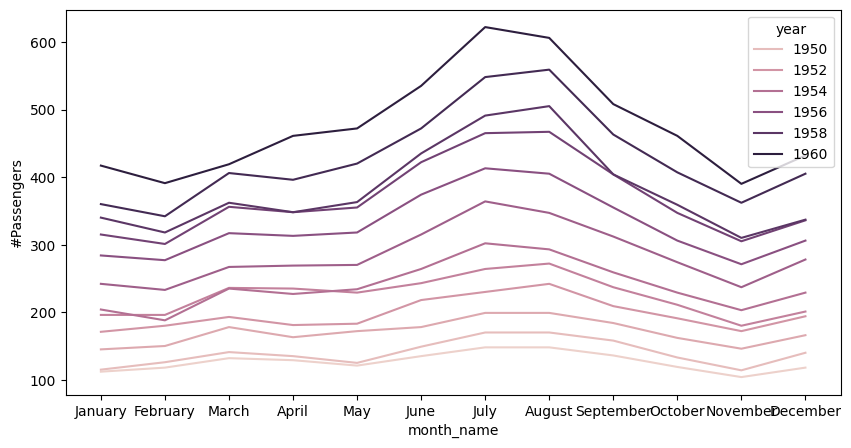

In [41]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data2, x='month_name', y='#Passengers', hue='year', ax=ax)
#ax.axvline('June')

#극좌표계 => matplotlib

<PolarAxes: >

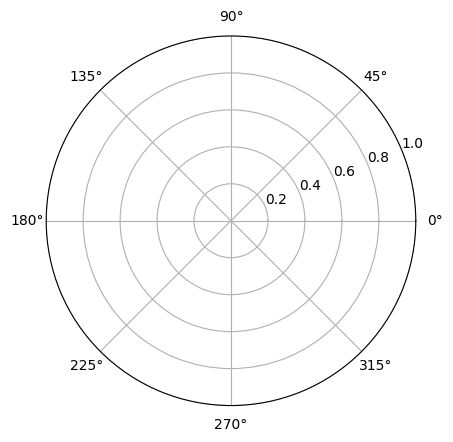

In [42]:
plt.axes(polar=True)

In [43]:
!pip install -U season-polar-plots  #설치 -

In [44]:
import season_polar_plots # 사용 _

In [45]:
dir(season_polar_plots)

['SeasonData',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'i0',
 'linregress',
 'math',
 'np',
 'pd',
 'plt',
 'season',
 'sns',
 't',
 'vonmises']

In [46]:
from season_polar_plots import SeasonData

In [47]:
ad = SeasonData(data, 1950, 1960, 'daily')  #daily 하면 월별 하나만 있어서 #monthly

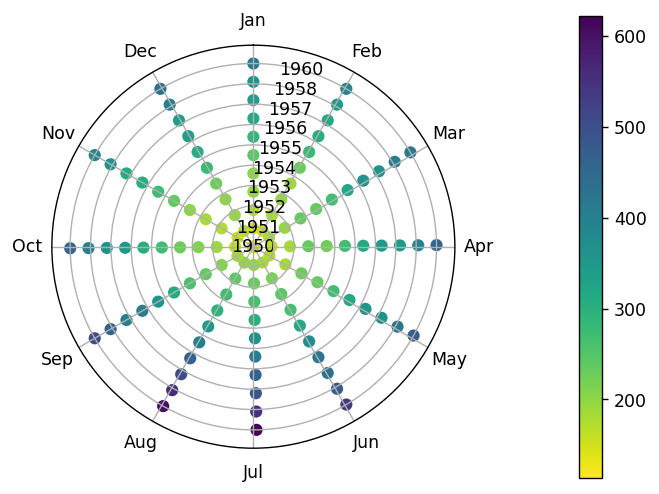

In [48]:
ad.sp_plot()

In [49]:
ad = SeasonData(data, 1950, 1960, 'monthly')

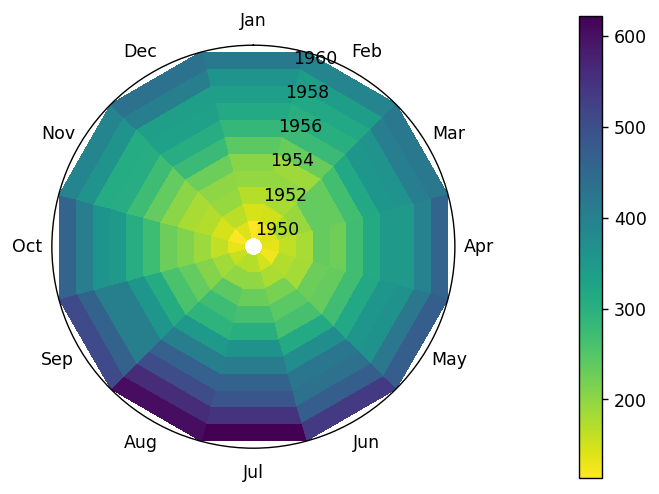

In [50]:
ad.sp_plot()

In [51]:
ad = SeasonData(data, 1950, 1960, 'daily')

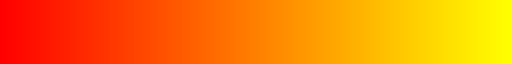

In [52]:
plt.cm.autumn

([300.0, 400.0, 500.0, 600.0, 700.0],
 [Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700')])

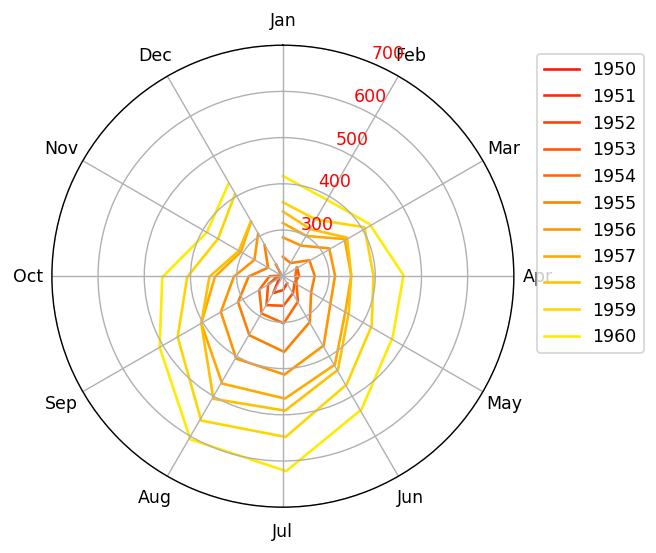

In [53]:
ad.sp_plot(rd_years=False, col='autumn', off=10, pmarker='x', psize=50)
plt.ylim(200,700)    #plt.title('Title')
plt.yticks(color='red')

#

In [54]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
 2   month        144 non-null    int64         
 3   month_name   144 non-null    object        
 4   year         144 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.8+ KB


In [55]:
import statsmodels.api as sm

In [79]:
data2.set_index('Month', inplace=True)

In [80]:
data3 = data2[['#Passengers']]

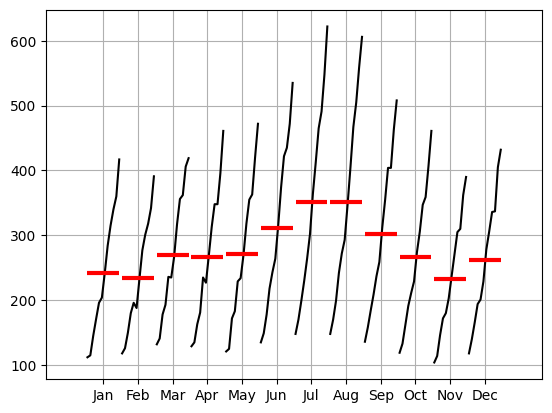

In [82]:
p = sm.graphics.tsa.month_plot(data3)  #sm.graphics.tsa.month_plot(data3);
plt.grid(True)

In [59]:
import numpy as np

In [60]:
np.random.choice([1,2,3])

1

In [64]:
data2.category = np.random.choice([1,2,3], size=144)

In [65]:
data2.category.value_counts()

1    51
3    47
2    46
Name: category, dtype: int64

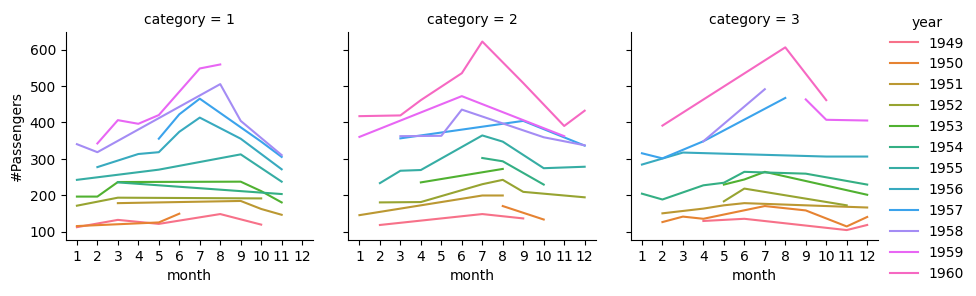

In [78]:
g = sns.FacetGrid(data2, col='category', hue='year')
g.map(sns.lineplot, 'month','#Passengers')
g.add_legend()
#g.set_xticklabels(['1','2','3','4','5','6','7'])
g.set(xticks=[1,2,3,4,5,6,7,8,9,10,11,12])
#g.set(xticks=range(1,13))

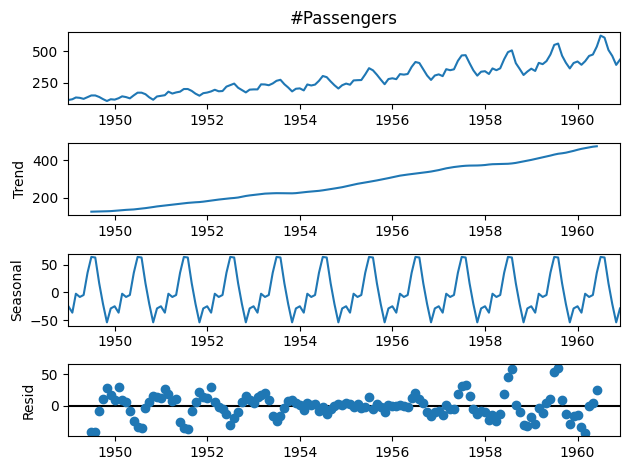

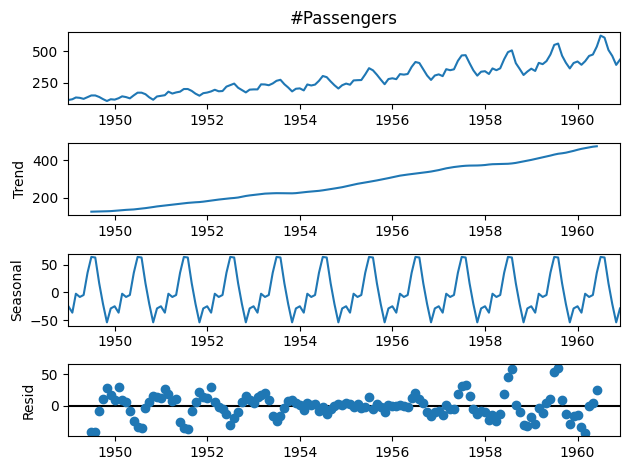

In [85]:
sm.tsa.seasonal_decompose(data2['#Passengers']).plot()


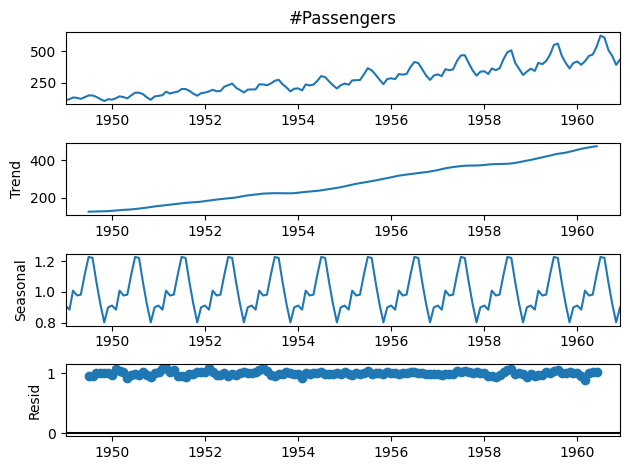

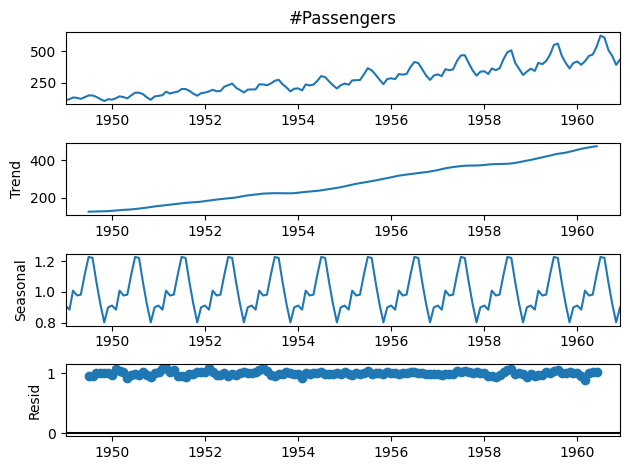

In [86]:
sm.tsa.seasonal_decompose(data2['#Passengers'], model='multiplicative').plot()
